# Week 4: Homework 1 

----------------------------------------------------
Machine Learning                      

Year 2019/2020

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* 

----------------------------------------------------

<span style="color:red">
NOTEBOOK GRADE: 9 <br>
EXAM GRADE: 7.5  <br> 
OVERALL GRADE: 8.25
</span>

The goal of this practice is to analyze the performance of different estimators on the Diabetes problem and we will analyze, by means of different approximations, which input features are more relevant to solve this problem. 

Note that previous week we already worked on Diabetes database, but we only used one of the input variable (BMI) to construct the regression model; in this practice we will use all the input features jointly.

To solve these notebook, complete the following sections implementing the solution that you consider most appropriate and showing the results that you find most interesting. For the evaluation of this notebook,  we will take into account the methodology used, the solution adopted, the presentation of the results and the conclusions obtained at the light of the results.


## 1. Data loading and preprocessing

Following the ML pipeline, start loading the data, creating the partitions that you consider necessary and carrying out the preprocessing that yu need.

Keep in mind that there is no single valid solution, and different reasons can lead you to make different data partitions or apply different normalizations. So **please justify the steps you are taking**.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Cogemos en la X las features y en Y las salidas, nos guardamos los feature_names por si en algún momento
## queremos plotear algo con los títulos de las columnas de X.
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target
feature_names = diabetes.feature_names

# Hacemos la partición, el test_size tiene que ser mayor que el train para que tengamos datos con los que
# testear que con los que entrenar. Así, al tener más para testear será más difícil que se memorice los datos de entrenamiento
# porque habrá más para testear.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)


# Data normalization: normalizamos tanto train como test para poder trabajar con ellos.
transformer = StandardScaler().fit(X_train)  
X_train_norm = transformer.transform(X_train) 
X_test_norm =  transformer.transform(X_test)



## 2. Performance evaluation 

Now, analyze the performance of different estimators to predict the diabetes progression from all the available features. 

As possible estimators to be included in this study, we will consider those studied so far: K-NN, linear regressor, polynomial regressor and their regularized versions. Please, in case these methods have any free hiperparameter, **clearly justify** the selection of their optimal values.

As you know, for the performance evaluation, we have seen several metrics. So, here, you can use one or several of them. But, regardless of the used metric, don't forget to include a final analysis comparing the performance of different methods and trying to justify the obtained results.

## 2.1 KNN


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

#Definimos el KNN
knn2 = KNeighborsRegressor()
#Para encontrar la K óptima, usamos la función GridSearchCV para que nos compare las posibles K y nos devuelva el mejro parámetro
#Vamos de 1 a 40 para asegurarnos de tener una gran variabilidad.
rang_K = np.arange(1,40,1)
parameters = {"n_neighbors": rang_K}
#definimos el GSCV con el mean_squared negativo porque nos da una visión (si quisieramos plotear) más entendible de encontrar el valor óptimo puesto que será el más alto
#los K-folds realmente hacen referencia a las particiones que vamos a hacer del training y validation para hacer cross-validation.
#su valor no puede ser igual al número
clf = GridSearchCV(knn2, parameters, cv=10,scoring="neg_mean_squared_error",iid=False)


clf.fit(X_train, Y_train)
clf.best_estimator_
y_pred = clf.predict(X_test)
MSE_test = np.mean((Y_test-y_pred)**2)

r2_score_KNN = r2_score(Y_test, y_pred)

print("R2 score of KNN: %.2f" % r2_score_KNN)

R2 score of KNN: 0.41


 We define KNN. To find the OptK we use GridSearchCV to do a cross-validation with a 40 possibles values of K.

Then, we use the best K to fit our training data and predic our score, giving us a 0.41 score.

## 2.2 Linear Regression


In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, Y_train)

y_pred_LR = lr.predict(X_test)

r2_score_LR = r2_score(Y_test, y_pred_LR)
print('R2 score of LR without regularization: %.2f' % r2_score_LR)




R2 score of LR without regularization: 0.39


On the linear regression method there isn't any value to estimate or select as optimal. So we define a linear regression, fit the trainer and try to predict our final score. As we can see, is worse than the another method (0.39).

### 2.2.2 Linear Regression with LASSO (L1)

In [6]:
from sklearn.linear_model import LassoCV

alphas = np.linspace(0.001,10,1000)

lasso = LassoCV(cv=5,alphas=alphas, random_state=0)

# Train the model using the training sets
lasso.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred_Lasso = lasso.predict(X_test)

# The coefficients
print('Best alpha: \n', lasso.alpha_)

r2_score_lasso = r2_score(Y_test, y_pred_Lasso) 
# Explained variance score: 1 is perfect prediction
print('R2 score of Lasso: %.2f' % r2_score_lasso)

coeff_used = np.sum(lasso.coef_!=0)
coeff_no = X_train.shape[1]-coeff_used
print ("number of features used:", coeff_used)
print ("number of features erased", coeff_no )

print("Features used:")
for index,element in enumerate(lasso.coef_):
  if element != 0:
    print(feature_names[index])


Best alpha: 
 0.07106306306306306
R2 score of Lasso: 0.40
number of features used: 8
number of features erased 2
Features used:
age
sex
bmi
bp
s1
s3
s5
s6


In this case, we improve the LR adding a regularization method. In this case we use L1 (LASSO) that can erase features not used. On this method we have to decide the value of alpha. In order to do this, we crossvalidate using 5 cv and an array of possible alphas. As it is shown, the Lasso regularization erase 2 features and only uses 8 of them (age, sex, bmi, bp, s1, s3, s5 and s6). Therefore, the CV method gives us the best alpha asociated with the best estimator.

### 2.2.3 Linear Regression Ridge (L2)

In [9]:
from sklearn.linear_model import RidgeCV

maybe_alphas = np.linspace(0.001,10,1000)

ridge = RidgeCV(cv=5,alphas=maybe_alphas)

ridge_model = ridge.fit(X_train, Y_train)

y_pred_ridge = ridge.predict(X_test)

print('Best alpha: \n', ridge_model.alpha_)

r2_score_ridge = r2_score(Y_test, y_pred_ridge) 

print('R2 score of Ridge: %.2f' % r2_score_ridge)

ridge_model.coef_

for elements in (-abs(ridge_model.coef_)).argsort():
  print("Score: "+str(ridge_model.coef_[elements])+ " name: "+str(feature_names[elements]))



Best alpha: 
 0.04103603603603604
R2 score of Ridge: 0.39
Score: 552.6256556415602 name: s5
Score: 537.7535013869982 name: bmi
Score: 335.2246727323783 name: bp
Score: -221.49209594163028 name: s3
Score: -211.97264921910033 name: sex
Score: -120.45496259967037 name: s1
Score: -104.22225624532072 name: s2
Score: 68.941035988502 name: s4
Score: -60.728034253074384 name: age
Score: 56.12123157030079 name: s6


The linear regresssion ridge uses the L2 regularization method. In that case, our model doesn't erase features but weight them returning us the importances of them. As we can see, the most important features are: s5 and bmi. In this model we also have chosen the best alpha using cross-validation of 5 folders.

### 2.2.3.1 Elastic-Net

In [10]:
from sklearn.linear_model import ElasticNetCV



regr = ElasticNetCV(cv=5, alphas=alphas, random_state=0, l1_ratio=np.arange(0.01, 1.0, 0.01), n_jobs=-1)

regr.fit(X_train, Y_train)

print(regr.alpha_)



0.011009009009009009


In [11]:

print("Best score:")
print(regr.score(X_test,Y_test))
for elements in (-abs(regr.coef_)).argsort():
  print("Score: "+str(regr.coef_[elements])+ " name: "+str(feature_names[elements]))

Best score:
0.40037021491805924
Score: 527.4045620217665 name: s5
Score: 524.7545253706722 name: bmi
Score: 323.0975306972214 name: bp
Score: -229.5950232633456 name: s3
Score: -197.32128484501166 name: sex
Score: -110.63067730648952 name: s2
Score: -87.80161106637735 name: s1
Score: 60.4273282243968 name: s4
Score: 58.362875929700046 name: s6
Score: -49.98153777288919 name: age


Using the Elastic-Net we can observe that we got aproximatelly the same results as using L2 regularization method. In fact, the most valuables features are just the same as before with nearly values.
On this model we have usen also CV to validate both alpha and l1_ratio. The l1_ratio is the ratio between the power given to L1 or L2 regularization.

### 2.2.4 Poly Regression

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


steps = [('poly', PolynomialFeatures()), ('normalize', StandardScaler()), ('clf',LinearRegression())]
pipe = Pipeline(steps)

pipe.set_params(poly__include_bias=False)
pipe.set_params(clf__fit_intercept=True)
nfold=5

param_grid = dict(poly__degree=[1, 2, 3, 4])
pipe_grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=nfold, iid= False, scoring='r2')
pipe_grid_search.fit(X_train, Y_train)

y_pred_pol = pipe_grid_search.predict(X_test)

print('Best params: \n', pipe_grid_search.best_params_)

r2_score_pol = r2_score(Y_test, y_pred_pol) 

print('R2 score of normal: %.2f' % r2_score_pol)

Best params: 
 {'poly__degree': 1}
R2 score of normal: 0.39


On polynomial regression we use pipeline to go step by step in order to cross-validate all the params needed. First of all we have to cross-validate the best degree to perform our data. AS it is shown the best degree is the 1, so the best result is using a linear method because larger degrees may cause overfit.

### 2.2.5 Poly Regression Lasso


In [18]:
from sklearn import linear_model

steps = [('poly', PolynomialFeatures()), ('normalize', StandardScaler()), ('clf',linear_model.Lasso(max_iter=5000))]
pipe = Pipeline(steps)

pipe.set_params(poly__include_bias=False)
pipe.set_params(clf__fit_intercept=True)
nfold=5

param_grid = dict(poly__degree=[1, 2, 3, 4], clf__alpha=[0.1, 1, 5, 10, 50, 100])
pipe_grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=nfold, iid= False, scoring='r2')
pipe_grid_search.fit(X_train, Y_train)

y_pred_lass = pipe_grid_search.predict(X_test)

print('Best params: \n', pipe_grid_search.best_params_)

r2_score_pollass = r2_score(Y_test, y_pred_lass) 

print('R2 score of lasso: %.2f' % r2_score_pollass)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275.9676635515789, tolerance: 135.39487311320755
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2539.166798708975, tolerance: 135.71348820754716
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4976.103937343229, tolerance: 137.51342783018868
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2806.50719612

Best params: 
 {'clf__alpha': 5, 'poly__degree': 2}
R2 score of lasso: 0.40


Using Lasso we need to cross-validate alphas and poly degree. In that case it gives a warning that our object not converge, so its not the best method to perform. Otherwise, it gives us that the best degree is 2.

### 2.2.6 Poly Regression Ridge

In [20]:
from sklearn.linear_model import Ridge
steps = [('poly', PolynomialFeatures()), ('normalize', StandardScaler()), ('clf',Ridge())]
pipe = Pipeline(steps)

pipe.set_params(poly__include_bias=False)
pipe.set_params(clf__fit_intercept=True)
nfold=5

param_grid = dict(poly__degree=[1, 2, 3, 4], clf__alpha=[0.1, 1, 5, 10, 50, 100])
pipe_grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=nfold, iid= False, scoring='neg_mean_squared_error')
pipe_grid_search.fit(X_train, Y_train)

y_pred_ridge = pipe_grid_search.predict(X_test)

print('Best params: \n', pipe_grid_search.best_params_)

r2_score_polridge = r2_score(Y_test, y_pred_ridge) 

print('R2 score of Ridge: %.2f' % r2_score_polridge)

Best params: 
 {'clf__alpha': 10, 'poly__degree': 1}
R2 score of Ridge: 0.39


Meanwhile, using Ridge it converges quickly and gives us the same result as not using regularization. so we return to our conclusion that the best degree is 1, so the best model is the linear one.

### 2.2.7 Poly Regression Elastic-Net

In [33]:



steps = [('poly', PolynomialFeatures()), ('normalize', StandardScaler()), ('clf',linear_model.ElasticNet())]
pipe = Pipeline(steps)

pipe.set_params(poly__include_bias=False)
pipe.set_params(clf__fit_intercept=True)
nfold=5

param_grid = dict(poly__degree=[1, 2, 3, 4], clf__alpha=[0.1, 1, 5, 10, 50, 100])
pipe_grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=nfold, iid= False, scoring='neg_mean_squared_error')
pipe_grid_search.fit(X_train, Y_train)

y_pred_ridge = pipe_grid_search.predict(X_test)
print('Best params: \n', pipe_grid_search.best_params_)

r2_score_en = r2_score(Y_test, y_pred_en) 

print('R2 score of Elastic-net: %.2f' % r2_score_en)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11047.835657251067, tolerance: 135.39487311320755
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5834.942792104994, tolerance: 135.71348820754716
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3497.156841904565, tolerance: 137.51342783018868
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6497.7175782

Best params: 
 {'clf__alpha': 0.1, 'poly__degree': 1}
R2 score of Elastic-net: 0.39


<span style="color:red">
Be careful, the selected value of alpha is in the extreme of the explored range. If you extend your range to 0.01, 000.1, ...., it's possible that you get better performance. Besides, elatic net has two parameters and you only explore one. I think that the other parameter is set by deafult to the lasso case...
</span>

With elastic-net we are using a mixture between L1 and L2 and it returns us the same warning as using L1. It return us the same result as Ridge, that the poly_degree is 1.

<span style="color:red">
You can adjust the tolerance parameter of the lasso and elastic net methods to avoid these warnings and improve the method performance <br>
I miss any conclusions and/ or comparitve analysis of these results. Which approach is the best? Linear or no-linear methods?   <br>
Polynomial ridge regression uses a degree of 1 and polynomial lasso regression uses a degree of 2. Any idea?
</span>

## 3. Study of feature relevance and feature selection

In this last section, using different criteria, you have to analyze the relevance of the input features. Thus, you will have to find a subset with the $D'$ most relevant features and, using this subset of features, analyze the final performance of a regressor (for the sake of simplicity, consider a linear ridge regressor as final regressor).

To analyze the feature importances or relevances, you can use the following criteria:

1. **Relevance ranking based on the validation error**: if there were $D$ input features, we could try to train $D$ regressors where each regressor uses one (and only one) different input feature. According to the final perfomance of each regressor (evaluated on a validation set or with a CV proccess), we could rank the features (the most relevant feature is the one providing the lowest error). Using this ranking, we can select the $D'$ most relevant features as the $D'$ top-ranked ones. Note that this scheme only analyzes the isolated relevance of each feature to predict the output; so, it is said that this approach is *univariate*.

 <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/FeatureRanking.png" width="90%" > 


2. **Greedy search based on the validation error**: approach (1) has the disadvantage of not taking into account relationships between features. For instance, method (1) would not realize that two features can be rendundant or that a feature, that is useless by itself, can be very useful combined with another feature. To overcome this drawback, we should have to analyze subsets of features; however, exploring all possible subsets  is usually computationally unflexible (there are $2^D$ combinations!!!!); so a greedy search (fordward or backward) is usually prefered:

  2.1 *Fordward search*: It starts with an empty set and, iteratively, adds new features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Forward_search.png" width="48%" > 

  2.2 *Backward search*: It starts considering all the features and, iteratively, removes features according to a relevance criterion (in this case, minimum validation MSE).

  <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Regression/Fig_Backward_search.png" width="48%" > 

3. **Ridge linear regression with a prunning**: We know that the L2 regularization limits the magnitude of the weight vector to avoid overfitting problems, but these weigths do not become to null. However, in a linear model, *the weight magnitude can be an indicative of the feature relevance* and, unlike approach (1), all features are analyzed at the same time (*multivariate approach*). Use the weigth magnitude to generate a ranking of features and, later, use this ranking to select the $D'$ most relevant features.

4. **Lasso linear regression**: In this case, the L1 penalty allows us to directly eliminate some of the input features. Explore different values of the regularization parameter $\lambda$ to get a sequence of selected feature sets (from a single feature to all features).


5. **Elastic-net linear regression**: This last approach combines L1 and L2 regularizations, thus including the advantages of both methods. Varying adequately their regularization parameters, create a sequence of feature selection subsets. 



Final comments:

* Due to part of the feature selection process involves selecting the optimum number of features, to avoid additional complexity (having to validate this number), you can analyze the different methods by exploring the curves of MSE vs. number of selected features ($D'$).

* It is not necessary to apply all these methods to complete this notebook (you can choose, at least, three of them). In fact, the implementation of greedy search approaches require an advanced knowledge of Python; so take this into account when you design your notebook solution.

* **Please, analyze in detail the different results, pointing out the advantages/disadvantages of each feature selection scheme**. Think about the behaviour of the different criteria in cases where a feature is irrelevant or there are redundant features. Additional experiments helping you to support any of your conclusions will be welcome.

## 3.1 Ranking based on MSE


In [34]:
MSE_ranking = []
n = X.shape[1]
maybe_alphas = np.linspace(0.001,10,1000)
ridge = RidgeCV(alphas=maybe_alphas)
for i in range(n):
  
  ridge_model2 = ridge.fit(X_train[:,i][:,np.newaxis], Y_train)

  y_pred_ridge2 = ridge.predict(X_test[:,i][:,np.newaxis])
  
  MSE_ranking.append(np.mean((Y_test-y_pred_ridge2)**2))
  
MSE_ranking = np.asarray(MSE_ranking)

print("Features in order of relevancy based on MSE:")
print(MSE_ranking)
feat_rel_MSE = []
for index, elements in enumerate(MSE_ranking.argsort()):
  feat_rel_MSE.append(feature_names[elements])

  
print(feat_rel_MSE)


X_train_red = X_train[:, MSE_ranking.argsort()[:4]]
X_test_red = X_test[:, MSE_ranking.argsort()[:4]]


ridge_final_mse =ridge.fit(X_train_red, Y_train)

y_pred_final_ridge = ridge.predict(X_test_red)


print('R2 score using only the 4th most relevant features based on MSE: %.2f' % r2_score(Y_test, y_pred_final_ridge) )
print('Versus')
print('R2 score using all the features: %.2f' %  r2_score_ridge)




Features in order of relevancy based on MSE:
[5047.38954437 5269.47848288 3786.39417761 4718.72343274 5117.16333904
 5159.86391871 4734.69531437 4373.96974114 4148.06402569 4627.62285166]
['bmi', 's5', 's4', 's6', 'bp', 's3', 'age', 's1', 's2', 'sex']
R2 score using only the 4th most relevant features based on MSE: 0.37
Versus
R2 score using all the features: 0.39


As we can see, if we use the MSE ranking to evaluate the relevancy of each feature we obtain a score. In fact, what we are testing is the relevancy of each feature working alone. We are not taking into account the combination of them working together, that can be the fact that gives us worse prediction.


<span style="color:red">
It's a bit strange that you rank your features with MSE, but you use R2 to evaluate the method performance. It's better to be coherent using the same measurement for both ranking and evaluate. <br>
Besides, you rank your features with the test error. I'm asking you a relevance ranking based on the validation error!!!! <br>
Why are you getting the final performance with 4 features???
</span>

## 3.2 Greedy search based on the validation error

### Forward selection

In this case we uses MLXTend SequentialFeatureSelector that implements the forward greedy search. In fact, we are going to train for all posible subset sizes. If we have 10 features, we are going to use a for going from 1 to 10 trying all the subsets of features. Also, we are doing cross-validation with a 5 folder CV to prove different types of subsets randomly. Then, we append each score to compare which subset of features gives us the best score.

In [35]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import SCORERS



# Build step forward feature selection
scorer_k = []
feat_sel_forward = []
for k in range(X_train.shape[1]):
  sfs1 = sfs(ridge,
             k_features=k+1,
             forward=True,
             floating=False,
             verbose=0,
             scoring='r2',
             cv=5)
  sfs1 = sfs1.fit(X_train, Y_train)
  scorer_k.append(sfs1.k_score_)
  feat_sel_forward.append(sfs1.k_feature_idx_)
  


print("Scores (R2) using diferent k_features input, from 1 to 10:")
print(scorer_k)
print("Maximum score (R2) obtained:")
print(np.amax(np.asarray(scorer_k)))
print("Obtained used k_subset of size:")
print(np.argmax(np.asarray(scorer_k))+1)

feat_rel_fw = []
for elements in feat_sel_forward[np.argmax(np.asarray(scorer_k))]:
  feat_rel_fw.append(feature_names[elements])

print(feat_rel_fw)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Scores (R2) using diferent k_features input, from 1 to 10:
[0.3670936150334024, 0.499802752587447, 0.5179771716570686, 0.5381629358946187, 0.5417332604078625, 0.5502416448735754, 0.5487351983595299, 0.5449278932364505, 0.539698037320315, 0.5371596190647546]
Maximum score (R2) obtained:
0.5502416448735754
Obtained used k_subset of size:
6
['sex', 'bmi', 'bp', 's1', 's2', 's5']


Using a forward selection, it returns us that the best subset of features is using 6 features and using the ones mentioned in the array before. Lets try it.

In [38]:
X_train_red = X_train[:, feat_sel_forward[np.argmax(np.asarray(scorer_k))][:]]
X_test_red = X_test[:, feat_sel_forward[np.argmax(np.asarray(scorer_k))][:]]

print("Features used:")
print(feat_sel_forward[np.argmax(np.asarray(scorer_k))][:])
print("Size of our X_train to verify that we are using the correct number of features")
print(X_train_red.shape)

ridge = ridge.fit(X_train_red, Y_train)

y_pred_final_ridge = ridge.predict(X_test_red)

fw = str(r2_score(Y_test, y_pred_final_ridge))
print('R2 score using only the 6th most relevant features based on forward selection: ' + fw )
print('Versus')
print('R2 score using all the features: %.2f' %  r2_score_ridge)

Features used:
(1, 2, 3, 4, 5, 8)
Size of our X_train to verify that we are using the correct number of features
(265, 6)
R2 score using only the 6th most relevant features based on forward selection: 0.390040998439935
Versus
R2 score using all the features: 0.39


As it is shown, we obtained the same prediction accuracy (based on R2) using only 6 features. It shows that the 4 features didn't used are not usefull and we can only focus on using that 6 features.

<span style="color:red">
Good work and good conclusions! <br>
I didn't know the MLXTend SequentialFeatureSelector toolbox. Interesting!!!!
</span>

### Backward selector

In [39]:
# Build step forward feature selection
scorer_k2 = []
feat_sel_backward = []
for k in range(X_train.shape[1]):
  sfs2 = sfs(ridge,
             k_features=k+1,
             forward=False,
             floating=False,
             verbose=0,
             scoring='r2',
             cv=5)
  sfs2 = sfs2.fit(X_train, Y_train)
  scorer_k2.append(sfs2.k_score_)
  feat_sel_backward.append(sfs2.k_feature_idx_)
  


print("Scores (R2) using diferent k_features input, from 1 to 10:")
print(scorer_k2)
print("Maximum score (R2) obtained:")
print(np.amax(np.asarray(scorer_k2)))
print("Obtained used k_subset of size:")
print(np.argmax(np.asarray(scorer_k2))+1)

feat_rel_bw = []
for elements in feat_sel_backward[np.argmax(np.asarray(scorer_k2))]:
  feat_rel_bw.append(feature_names[elements])

print(feat_rel_bw)

Scores (R2) using diferent k_features input, from 1 to 10:
[0.3670936150334024, 0.499802752587447, 0.5179771716570686, 0.5381629358946209, 0.5417332604078625, 0.5502416448735754, 0.5487351983595299, 0.5436935172290537, 0.5408888926695636, 0]
Maximum score (R2) obtained:
0.5502416448735754
Obtained used k_subset of size:
6
['sex', 'bmi', 'bp', 's1', 's2', 's5']


Using the backward selector it gives us that the best subset of parameters to use is 6. Let's now train our model with that 6 features.

In [40]:
X_train_red = X_train[:, feat_sel_backward[np.argmax(np.asarray(scorer_k2))][:]]
X_test_red = X_test[:, feat_sel_backward[np.argmax(np.asarray(scorer_k2))][:]]

print("Features used:")
print(feat_sel_backward[np.argmax(np.asarray(scorer_k2))][:])
print("Size of our X_train to verify that we are using the correct number of features")
print(X_train_red.shape)

ridge.fit(X_train_red, Y_train)

y_pred_final_ridge = ridge.predict(X_test_red)

bw = str(r2_score(Y_test, y_pred_final_ridge))
print('R2 score using only the 6th most relevant features based on backward selection:' +bw )
print('Versus')
print('R2 score using all the features: %.2f' %  r2_score_ridge)


Features used:
(1, 2, 3, 4, 5, 8)
Size of our X_train to verify that we are using the correct number of features
(265, 6)
R2 score using only the 6th most relevant features based on backward selection:0.390040998439935
Versus
R2 score using all the features: 0.39


As it is shown, we obtained the same prediction accuracy (based on R2) using only 6 features. It shows that the 4 features didn't used are not usefull and we can only focus on using that 6 features. Also, it gives us the same result as using forward selector. It confirms us the good result of both methods.

<span style="color:red">
Great!!!!
</span>

## 3.4 Ridge linear regression with a prunning

Features weighted before ordering:
[ 60.72803425 211.97264922 537.75350139 335.22467273 120.4549626
 104.22225625 221.49209594  68.94103599 552.62565564  56.12123157]
Features in order of relevancy based on Ridge regularization:
['s5', 'bmi', 'bp', 's3', 'sex', 's1', 's2', 's4', 'age', 's6']
Mean of weights: 226.95360955785358


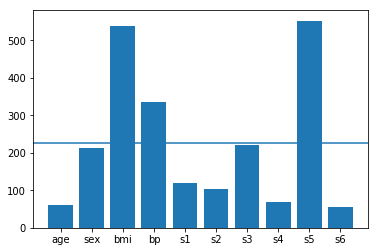

Features above mean: 
[8, 2, 3]
['s5', 'bmi', 'bp']


In [57]:

weights_ridge_abs = abs(ridge_model.coef_)
weights_ridge_pos = (-weights_ridge_abs).argsort()[:n]
print("Features weighted before ordering:")
print(weights_ridge_abs)
print("Features in order of relevancy based on Ridge regularization:")

feat_rel_ridge = []
feat_above_mean = []
for elements in weights_ridge_pos:
  feat_rel_ridge.append(feature_names[elements])
  
  if weights_ridge_abs[elements] > np.mean(weights_ridge_abs):
    feat_above_mean.append(elements)
  
print(feat_rel_ridge)

print("Mean of weights: " + str(np.mean(weights_ridge_abs)))

plt.bar(feature_names,weights_ridge_abs)
plt.axhline(y=np.mean(weights_ridge_abs))
plt.show()

print("Features above mean: ")
print(feat_above_mean)
feat_above_mean2=[]
for elements in feat_above_mean:
  feat_above_mean2.append(feature_names[elements])

print(feat_above_mean2)

That method gives us a weighted view of our features. Lets train a ridge model using only the features that are above the mean. As can be shown below, the score obtained is the same as using all the features. So we have prunned which features are really interesting to our model.

<span style="color:red">
Great!!!! Using the mean to set a threshold is a nice criterium.
</span>

In [59]:
X_train_red = X_train[:, feat_above_mean[:]]
X_test_red = X_test[:, feat_above_mean[:]]

print("Features used:")
print(feat_above_mean[:])
print("Size of our X_train to verify that we are using the correct number of features")
print(X_train_red.shape)

ridge.fit(X_train_red, Y_train)

y_pred_final_ridge = ridge.predict(X_test_red)

l2 = str(r2_score(Y_test, y_pred_final_ridge))
print('R2 score using only the features above the mean most relevant features based on Ridge prunning: ' +l2 )
print('Versus')
print('R2 score using all the features: %.2f' %  r2_score_ridge)


Features used:
[8, 2, 3]
Size of our X_train to verify that we are using the correct number of features
(265, 3)
R2 score using only the features above the mean most relevant features based on Ridge prunning: 0.38786380847366697
Versus
R2 score using all the features: 0.39


## 3.5 Lasso regularization method

Using Lasso regularization we have erased 2 features
Features erased: 
['s2', 's4']
Features in order of relevancy: 
['s5', 'bmi', 'bp', 's3', 'sex', 's1', 'age', 's6', 's2', 's4']


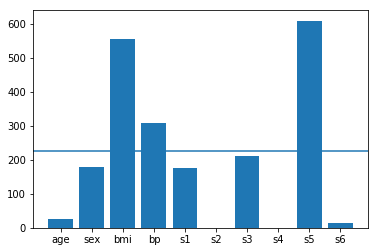

In [61]:

coeff_used = np.sum(lasso.coef_!=0)
coeff_erased = X.shape[1] - coeff_used

w_lasso_abs = abs(lasso.coef_)
w_lasso_pos = (-w_lasso_abs).argsort()[:n]

print("Using Lasso regularization we have erased "+str(coeff_erased)+" features")

erased_features = []

for index,element in enumerate(w_lasso_abs):
  if element == 0:
    erased_features.append(feature_names[index])

feat_rel_lasso = []
for element in w_lasso_pos:
  feat_rel_lasso.append(feature_names[element])
  

    
print("Features erased: ")
print(erased_features)
print("Features in order of relevancy: ")
print(feat_rel_lasso)

plt.bar(feature_names,abs(lasso.coef_))
plt.axhline(y=np.mean(weights_ridge_abs))
plt.show()

Using Lasso we figure out that two variables are useless to our model. In fact, it can be shown that the features more relevants are the same as using Ridge. Lets try to fit our model using the 8 features that are not equal to 0.

As shown below, we archieve the same result.

In [62]:
X_train_red = X_train[:, w_lasso_pos[:8]]
X_test_red = X_test[:, w_lasso_pos[:8]]

print("Features used:")
print(w_lasso_pos[:8])
print("Size of our X_train to verify that we are using the correct number of features")
print(X_train_red.shape)

ridge = ridge.fit(X_train_red, Y_train)

y_pred_final_ridge = ridge.predict(X_test_red)

l1 = str(r2_score(Y_test, y_pred_final_ridge))
print('R2 score using only the features above the mean most relevant features based on Lasso method: ' + l1)
print('Versus')
print('R2 score using all the features: %.2f' %  r2_score_ridge)

Features used:
[8 2 3 6 1 4 0 9]
Size of our X_train to verify that we are using the correct number of features
(265, 8)
R2 score using only the features above the mean most relevant features based on Lasso method: 0.39315651098116455
Versus
R2 score using all the features: 0.39


## 3.6 Elastic-Net reg method

Features weighted before ordering:
[ 49.98153777 197.32128485 524.75452537 323.0975307   87.80161107
 110.63067731 229.59502326  60.42732822 527.40456202  58.36287593]
Features in order of relevancy based on Ridge regularization:
['s5', 'bmi', 'bp', 's3', 'sex', 's2', 's1', 's4', 's6', 'age']


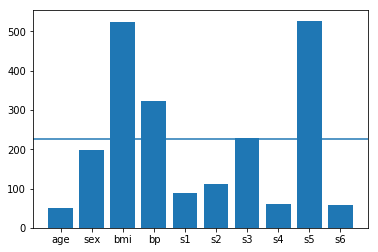

Mean of weights: 216.93769564978703
Features above mean: 
[8, 2, 3, 6]
['s5', 'bmi', 'bp', 's3']


In [64]:


weights_en_abs = abs(regr.coef_)
weights_en_pos = (-weights_en_abs).argsort()
print("Features weighted before ordering:")
print(weights_en_abs)
print("Features in order of relevancy based on Ridge regularization:")

feat_rel_en = []
feat_above_mean = []
for elements in weights_en_pos:
  feat_rel_en.append(feature_names[elements])
  
  if weights_en_abs[elements] > np.mean(weights_en_abs):
    feat_above_mean.append(elements)
  
print(feat_rel_en)


plt.bar(feature_names,weights_en_abs)
plt.axhline(y=np.mean(weights_ridge_abs))
plt.show()

print("Mean of weights: " + str(np.mean(weights_en_abs)))
print("Features above mean: ")
print(feat_above_mean)
feat_above_mean2=[]
for elements in feat_above_mean:
  feat_above_mean2.append(feature_names[elements])

print(feat_above_mean2)

As shown in the two last methods, our Elastic-Net regulirazation model has chosen the same features as before as the most relevant (8, 2 and 3). Also, it has chosen the feature 6 as relevant because is above the mean of weights. In that case, lets try to train with this 4 features.

In [65]:
X_train_red = X_train[:, feat_above_mean[:]]
X_test_red = X_test[:, feat_above_mean[:]]

print("Features used:")
print(feat_above_mean[:])
print("Size of our X_train to verify that we are using the correct number of features")
print(X_train_red.shape)

ridge.fit(X_train_red, Y_train)

y_pred_final_ridge = ridge.predict(X_test_red)

en = str(r2_score(Y_test, y_pred_final_ridge))
print('R2 score using only the features above the mean most relevant features based on Elastic-Net prunning: ' + en )
print('Versus')
print('R2 score using all the features: %.2f' %  r2_score_ridge)

Features used:
[8, 2, 3, 6]
Size of our X_train to verify that we are using the correct number of features
(265, 4)
R2 score using only the features above the mean most relevant features based on Elastic-Net prunning: 0.39377055739195754
Versus
R2 score using all the features: 0.39


# 4. CONCLUSIONS


In [76]:




print("--------------------Model 0: all features without feature selecion---------------------")
print("R2 score: " +str(r2_score_ridge))

print("--------------------Rest of models: r2 scores based on features selected by each model-----------------")
r2_dict = {
  "Lasso": l1,
  "Ridge": l2,
  "Elastic-Net": en,
  "Backward": bw,
  "Forward": fw,
}
print(r2_dict)
print("As it is shown,  we can archieve similar results using only some features for that model. That means that there are some features that are not relevant or gives us no-information. On that case, we can erase them to make our model easily to compute.")
print("The best perform has been given by:")
values = np.array(list(r2_dict.values()))
print(max(values))
print("And it has been given by the "+ np.array(list(r2_dict.keys()))[np.argmax(values)]  +" model.") 

--------------------Model 0: all features without feature selecion---------------------
R2 score: 0.39463297771427264
--------------------Rest of models: r2 scores based on features selected by each model-----------------
{'Lasso': '0.39315651098116455', 'Ridge': '0.38786380847366697', 'Elastic-Net': '0.39377055739195754', 'Backward': '0.390040998439935', 'Forward': '0.390040998439935'}
As it is shown,  we can archieve similar results using only some features for that model. That means that there are some features that are not relevant or gives us no-information. On that case, we can erase them to make our model easily to compute.
The best perform has been given by:
0.39377055739195754
And it has been given by the Elastic-Net model.
